### __2) Data exploration__

Start by some quick data exploration. Perform the following tasks

- Plot a few images from each category
- Make a scree plot, how many components explain 10%, 20%, …, 90% and 100% of the variance?
- Visualize the features on a 2d-plot with PCA using the 􀁿rst two components. What can you say about the results?

In [1]:
%matplotlib inline
import seaborn               as sns
import matplotlib.pyplot     as plt
import matplotlib.image      as mpimg
import pickle                as pickle
import tensorflow            as tf 
import os                    as os
import glob
import numpy                 as np
import pandas                as pd

from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline        import make_pipeline
from PIL                     import Image
from sklearn.decomposition   import PCA

In [2]:
data_dir = 'C:/Users/tgdreju4/OneDrive - Swisscom/EPFL/Notebooks/04ML/swissroads/'


##### Plot four images from each category
> Bike, car, moto, other, truck, van

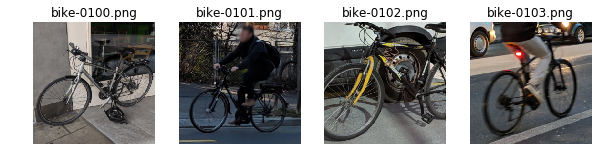

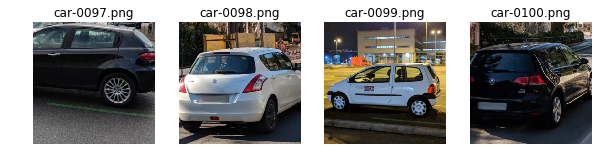

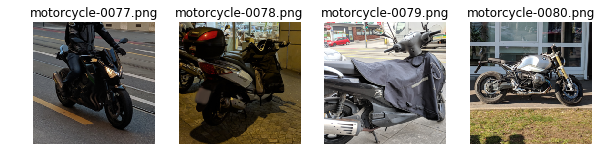

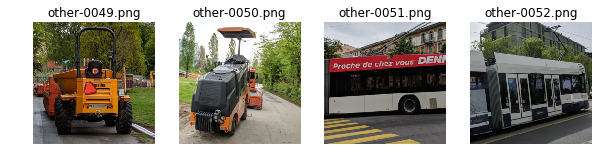

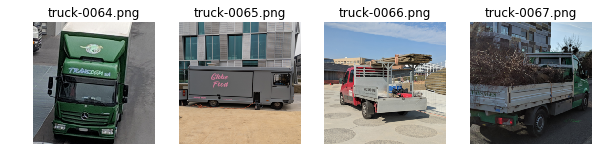

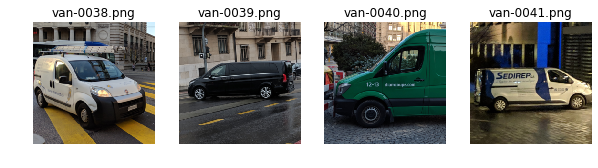

In [3]:
my_dir = data_dir + 'test/'
directory=os.listdir(my_dir)
for each in directory:
    plt.figure(figsize = (10,10))
    currentFolder = my_dir + each
    for i, file in enumerate(os.listdir(currentFolder)[0:4]):
        img=mpimg.imread(currentFolder + "/" + file)
        plt.subplot(1, 4, i+1)
        plt.axis("off")
        plt.imshow(img) 
        plt.title(file, size=12)

##### Visualize the features on a 2d-plot with PCA using the frst two components. What can you say about the results?

In [4]:
# Load train data
#dir =r'C:/Users/tgdreju4/OneDrive - Swisscom/EPFL/Notebooks/04ML/swissroads'

with np.load(data_dir + 'train.npz', allow_pickle=False) as npz_file:
#with np.load('C:/Users/tgdreju4/OneDrive - Swisscom/EPFL/Notebooks/04ML/swissroads/train.npz', allow_pickle=False) as npz_file:    
    X_tr = npz_file['features']
    y_tr = npz_file['labels']
    z_tr = npz_file['files']    
    train_data = dict(npz_file.items())


In [5]:
# Create PCA transformer with the first 2 components
pca2 = PCA(n_components=2)
pca2.fit(X_tr)

# Apply PCA to data
x_2d          = pca2.transform(X_tr)

# Create Standard scaler
scaler = StandardScaler()

# Rescale data
x_rescaled = scaler.fit_transform(X_tr)

# Apply PCA to rescaled data
x_2d_rescaled = pca2.transform(x_rescaled)




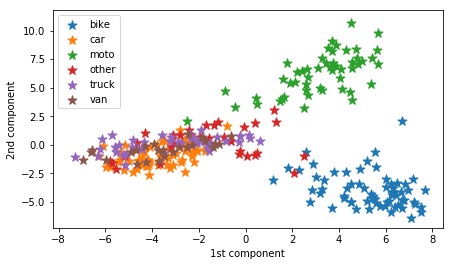

In [6]:
# Plot each kind of type
fig = plt.figure(figsize=(7,4))

kind_vals = ['bike', 'car', 'moto', 'other', 'truck', 'van']
for kind in [0  , 1, 2, 3, 4, 5]:
    # Swissroad type
    idx = (y_tr == kind)
    # Plot their components
    plt.scatter(x_2d[idx, 0], 
                x_2d[idx, 1], 
                label='{}'.format(kind_vals[kind]),
                marker= "*".format(i), s=90 # Size of each marker
               ) 
     
# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()



__Result:__
> With PCA using the first two components it is possible to identify and cluster moto and bike quite precisely. 
For all the other categories clustering is not possible, the first two principle components do not help to identify them correctly. Trucks, cars and vans are obviously quite similar which makes the classification difficult. There are some "other" objects within bikes and motos which will create wrong results.


##### Make a scree plot, how many components explain 10%, 20%, …, 90% and 100% of the variance?

In [7]:
# Create PCA transformer
pca3 = PCA(n_components=None)

# Apply PCA to rescaled data
pca3.fit(x_rescaled)
# Proportion of variance explained

pve = pca3.explained_variance_ratio_
print('Number of components: ', len(pve))




Number of components:  280


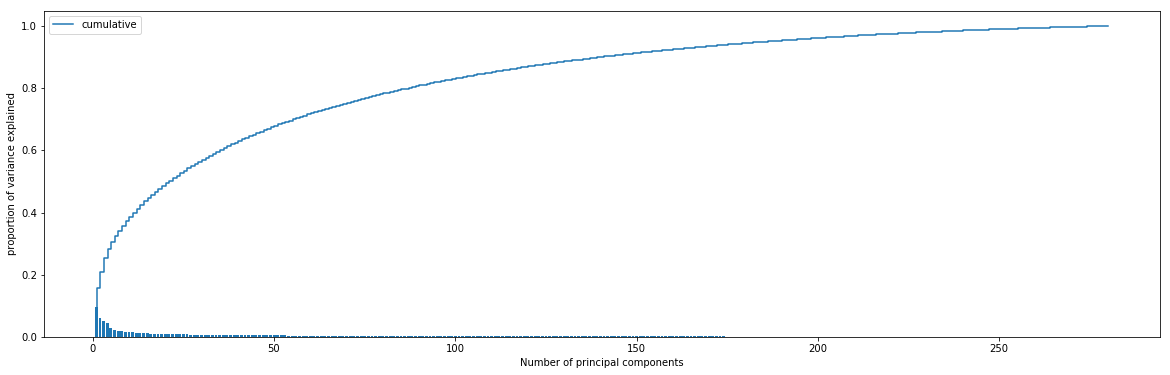

In [8]:
# Create bar plot

plt.figure(figsize=(20,6))
xcor = np.arange(1, len(pve) + 1) # 1,2,..,n_components
plt.bar(xcor, pve)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(xcor+0.1, pve_cumsum, label='cumulative')

# Add labels
plt.xlabel('Number of principal components')
plt.ylabel('proportion of variance explained')
plt.legend()
plt.show()


### Number of components explaining the percentage of the variance

In [9]:
for cum_var in np.arange(0.1,1.1,0.1):
    print("variance {} %   {} components" .format(round(cum_var*100), sum(pve_cumsum<cum_var) )) 

variance 10.0 %   1 components
variance 20.0 %   2 components
variance 30.0 %   5 components
variance 40.0 %   12 components
variance 50.0 %   21 components
variance 60.0 %   35 components
variance 70.0 %   55 components
variance 80.0 %   87 components
variance 90.0 %   140 components
variance 100.0 %   278 components
